In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Store Sales - Time Series Forecasting

In [36]:
data_train = pd.read_csv('train.csv')
data_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


store_nbr: identifies the store at which the products are sold.
family: identifies the type of product sold.
sales: gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion: gives the total number of items in a product family that were being promoted at a store at a given date.

(array([9.39139e+05, 2.30000e+01, 5.70000e+01, 3.30000e+01, 3.00000e+01,
        1.15326e+05, 3.30000e+01, 6.30000e+01, 3.90000e+01, 4.00000e+01,
        8.60070e+04, 4.00000e+01, 8.00000e+01, 5.30000e+01, 6.20000e+01,
        6.86280e+04, 6.60000e+01, 8.40000e+01, 5.80000e+01, 5.10000e+01,
        5.79190e+04, 9.00000e+01, 1.10000e+02, 7.70000e+01, 5.70000e+01,
        4.99440e+04, 1.03000e+02, 1.05000e+02, 8.60000e+01, 8.10000e+01,
        4.36600e+04, 1.12000e+02, 1.18000e+02, 1.02000e+02, 9.40000e+01,
        3.82990e+04, 1.25000e+02, 1.41000e+02, 1.30000e+02, 1.11000e+02,
        3.36960e+04, 1.61000e+02, 1.44000e+02, 1.27000e+02, 1.31000e+02,
        3.05400e+04, 1.30000e+02, 1.35000e+02, 1.43000e+02, 1.42000e+02,
        2.73280e+04, 1.58000e+02, 1.64000e+02, 1.60000e+02, 1.61000e+02,
        2.42790e+04, 1.70000e+02, 1.68000e+02, 1.71000e+02, 1.64000e+02,
        2.23000e+04, 1.73000e+02, 1.62000e+02, 1.57000e+02, 1.54000e+02,
        1.99610e+04, 1.75000e+02, 1.53000e+02, 1.75

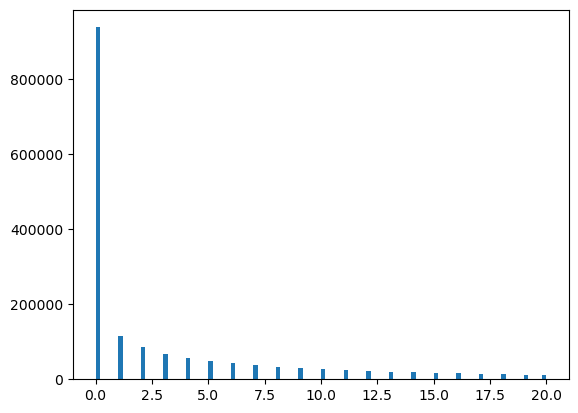

In [3]:
plt.hist(data_train['sales'], bins=100, range=(0,20))

In [4]:
data_store = pd.read_csv('stores.csv')
data_store

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.

In [5]:
data_test = pd.read_csv('test.csv')
data_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


predict the target sales for the dates in this file.

In [6]:
data_oil = pd.read_csv('oil.csv')
data_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [7]:
data_events = pd.read_csv('holidays_events.csv')
data_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer.

In [8]:
merge_data='merged_file.csv'
merged_file=pd.merge(data_oil, data_train, on='date', how='left')
merged_file.to_csv(merge_data, index=False)
print(f'Merged data on {merge_data}')

Merged data on merged_file.csv


In [9]:
pd.read_csv('merged_file.csv')

,date,dcoilwtico,id,store_nbr,family,sales,onpromotion
0,2013-01-01,NaN,0.0,1.0,AUTOMOTIVE,0.0,0.0
1,2013-01-01,NaN,1.0,1.0,BABY CARE,0.0,0.0
2,2013-01-01,NaN,2.0,1.0,BEAUTY,0.0,0.0
3,2013-01-01,NaN,3.0,1.0,BEVERAGES,0.0,0.0
4,2013-01-01,NaN,4.0,1.0,BOOKS,0.0,0.0
...,...,...,...,...,...,...,...
2143756,2017-08-25,47.65,NaN,NaN,NaN,NaN,NaN
2143757,2017-08-28,46.40,NaN,NaN,NaN,NaN,NaN
2143758,2017-08-29,46.46,NaN,NaN,NaN,NaN,NaN
2143759,2017-08-30,45.96,NaN,NaN,NaN,NaN,NaN


In [25]:
value='AUTOMOTIVE'
auto_list=[]
for i in merge_data['family']:
    if i==value:
        auto_list.append(i)

In [26]:
auto_list

['AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTIVE',
 'AUTOMOTI

In [27]:
value='BOOKS'
book_list=[]
for i in merge_data['family']:
    if i==value:
        book_list.append(i)

In [28]:
book_list

['BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',
 'BOOKS',


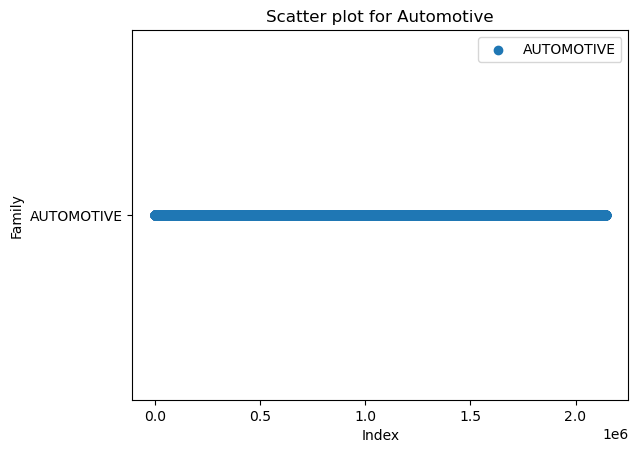

In [30]:
value='AUTOMOTIVE'
indices=[index for index, family_value in enumerate(merge_data['family']) if family_value==value]
plt.scatter(indices, [value]*len(indices), label=value)
plt.xlabel('Index')
plt.ylabel('Family')
plt.title('Scatter plot for Automotive')
plt.legend()
plt.show()

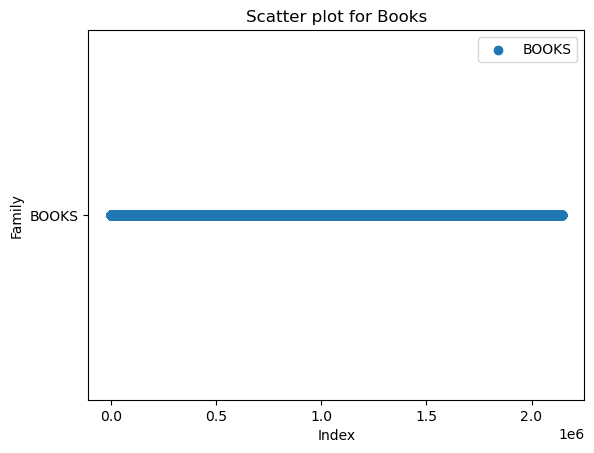

In [32]:
value='BOOKS'
indices=[index for index, family_value in enumerate(merge_data['family']) if family_value==value]
plt.scatter(indices, [value]*len(indices), label=value)
plt.xlabel('Index')
plt.ylabel('Family')
plt.title('Scatter plot for Books')
plt.legend()
plt.show()

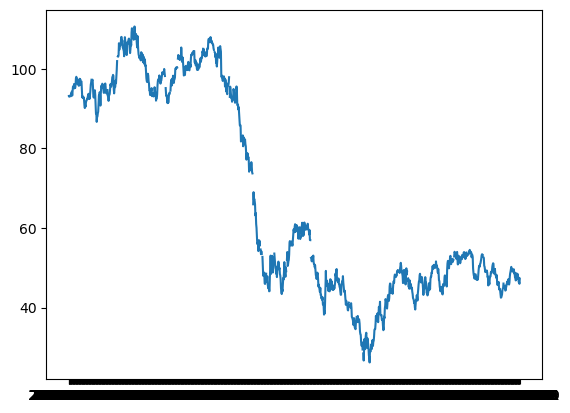

In [10]:
data_oil = pd.read_csv('oil.csv')
x_values=data_oil['date']
y_values=data_oil['dcoilwtico']
plt.plot(x_values, y_values, label='Oil  plot')
plt.show()

In [33]:
value='POULTRY'
poultry_list=[]
for i in merge_data['family']:
    if i==value:
        poultry_list.append(i)

In [34]:
poultry_list

['POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'POULTRY',
 'PO

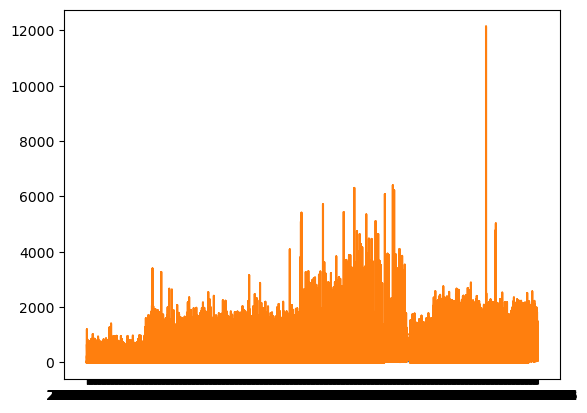

In [11]:
data_oil = pd.read_csv('oil.csv')
data_train=pd.read_csv('train.csv')
x_values_oil=data_oil['date']
y_values_oil=data_oil['dcoilwtico']
poultry_select=data_train['family']=='POULTRY'
y_values_train=data_train[poultry_select]['sales']
x_values_train=data_train[poultry_select]['date']
plt.plot(x_values_oil, y_values_oil, label='Oil')
plt.plot(x_values_train, y_values_train, label='Train')
plt.show()